# Pymaceuticals Inc.
---

### Analysis

- ##Data Preparation
Data Merging: The mouse_metadata and study_results datasets were merged based on the common column Mouse ID. This merged dataset contains comprehensive information about each mouse, including its metadata (e.g., drug regimen, sex, age, weight) and study results (e.g., time points, tumor volume, metastatic sites).

Data Cleaning: Duplicate entries for Mouse ID with duplicate time points were identified and removed. Specifically, data for mouse ID g989 contained duplicate entries across different time points.

- ##Summary Statistics
A summary of the tumor volumes for each drug regimen was generated, including the mean, median, variance, standard deviation, and SEM. Here are the key points:

Capomulin and Ramicane showed lower average tumor volumes compared to other regimens, suggesting a potential effectiveness in reducing tumor size.
Ketapril and Naftisol had higher mean tumor volumes, indicating less effectiveness in tumor reduction.

- ##Correlation and Regression Analysis
    Correlation Coefficient: The correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen was 0.842, indicating a strong positive correlation.
    Linear Regression: The regression line was plotted, with a slope of 0.954 and an intercept of 21.552. The strong positive correlation suggests that, within the Capomulin treatment group, mice with higher weights tended to have larger average tumor volumes.

 ##Overall Analysis
    Effectiveness of Drug Regimens: Capomulin and Ramicane appear to be the most effective in reducing tumor size based on lower average tumor volumes. The consistency in measurements and the absence of outliers further support their potential effectiveness.
Gender Balance: The study maintained a balanced representation of male and female mice, ensuring that gender-based biological differences were accounted for.
    Correlation Findings: The significant positive correlation between mouse weight and tumor volume in the Capomulin group suggests that weight might be a factor in tumor growth or response to treatment.
This analysis provides insights into the dataset, highlighting the promising results of certain treatments, the integrity of the study design, and potential biological considerations such as the impact of weight on tumor growth. If you have any specific aspects you'd like to delve deeper into or further analysis, please let me know!

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data = pd.merge(mouse_metadata, study_results, how='right')
# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique()
unique_mice_count


249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = Combined_data.loc[Combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

In [23]:
# Checking the number of mice in the clean DataFrame.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice


248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)

summary_stats_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

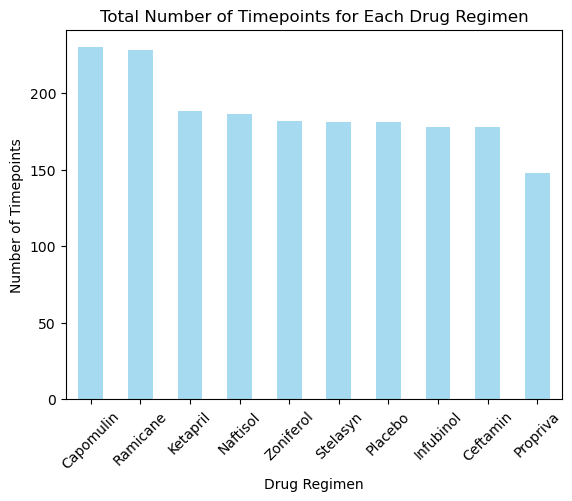

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Bar Chart: Total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
total_timepoints = clean_df["Drug Regimen"].value_counts()
total_timepoints.plot(kind='bar', color='skyblue', alpha=0.75)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()

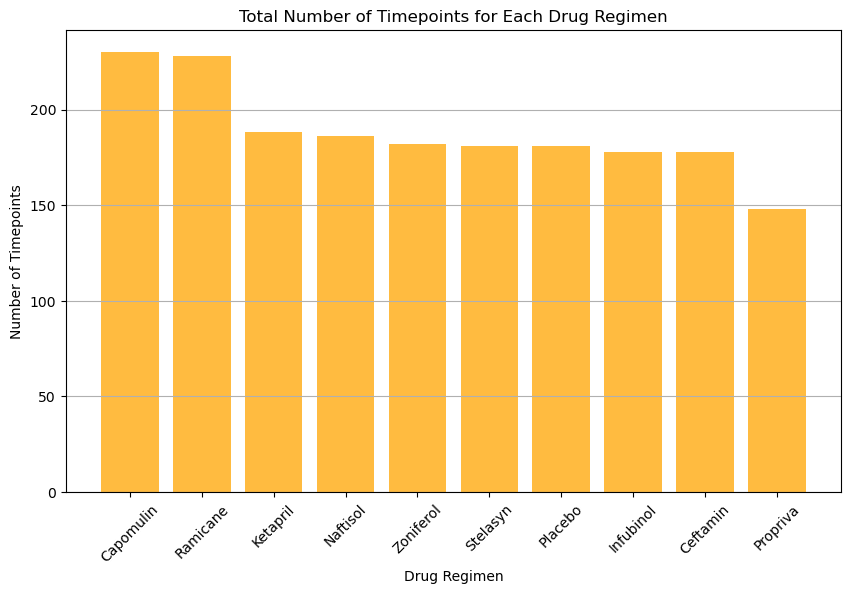

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(total_timepoints.index, total_timepoints.values, color='orange', alpha=0.75)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

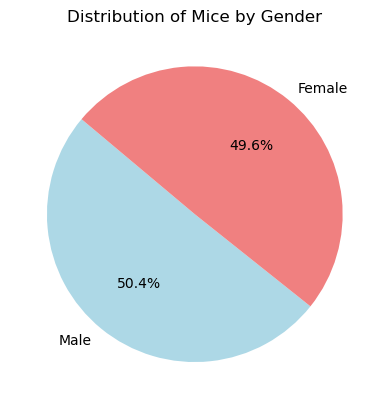

In [59]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_distribution = clean_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Mice by Gender')
plt.ylabel('')
plt.show()

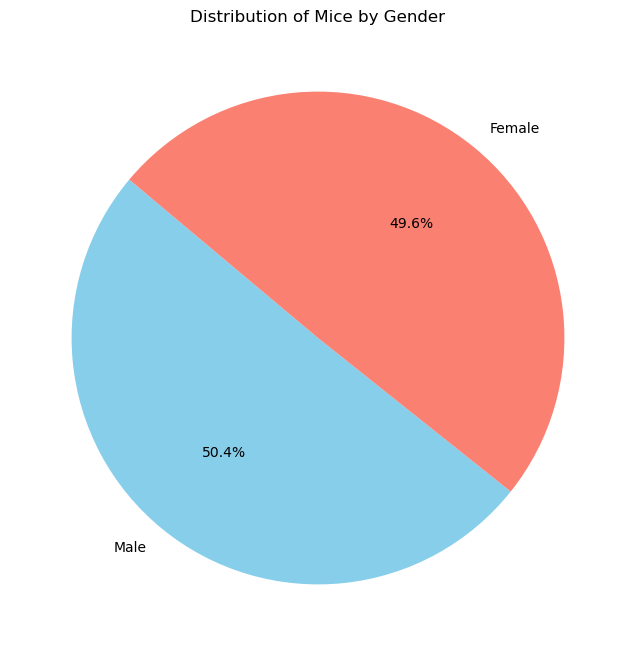

In [61]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across the four most promising treatment regimens
promising_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Grouped DataFrame that shows the last (greatest) time point for each mouse
last_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_last_timepoints = pd.merge(last_timepoints, clean_df, on=["Mouse ID", "Timepoint"])

# List to hold the tumor volume data
tumor_volumes = []

# Loop through each drug in the treatment list
for drug in promising_regimens:
    final_tumor_volumes = merged_last_timepoints[merged_last_timepoints["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volumes.append(final_tumor_volumes)

# Calculate quartiles, IQR, and determine potential outliers for each regimen
outliers = {}
for i, drug in enumerate(promising_regimens):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers[drug] = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]


outliers

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

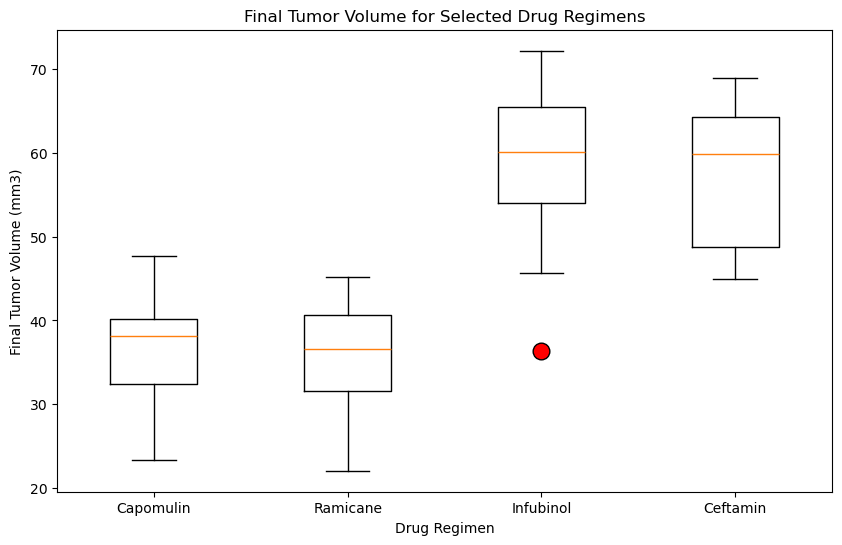

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

In [79]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Generate a box plot for the final tumor volume for all the mice in each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=promising_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12, 'linestyle': 'none'})
plt.title('Final Tumor Volume for Selected Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

outliers

## Line and Scatter Plots

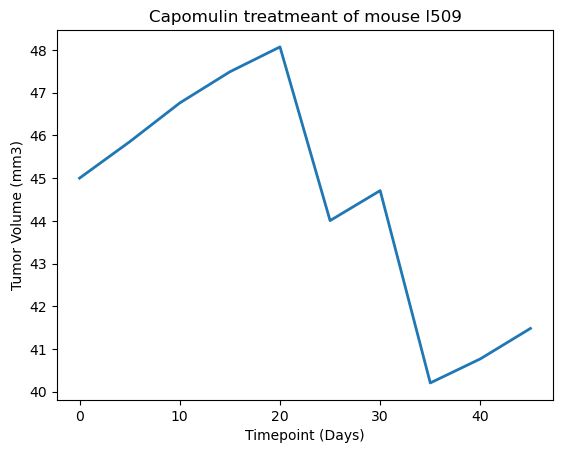

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# created a dataframe with specific mouse using the .loc() function and a boolean to find l509 data
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


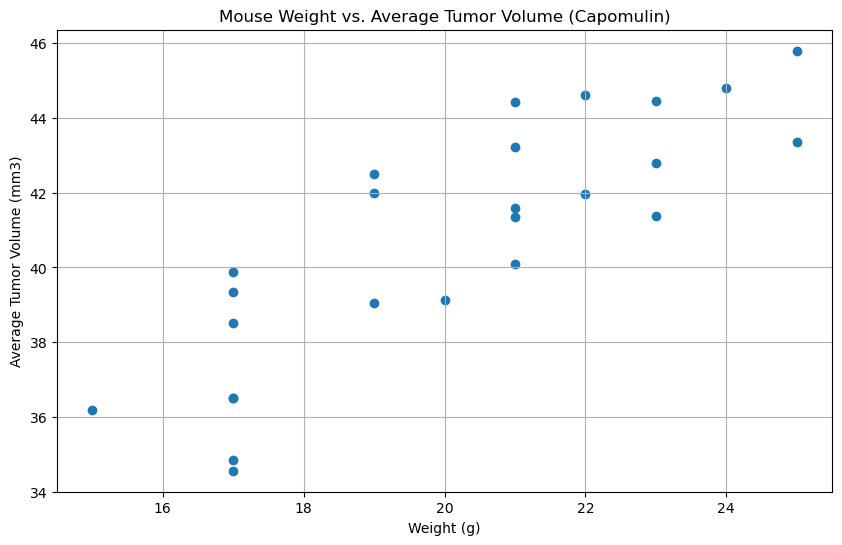

In [97]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "mean")
)

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight"], capomulin_avg_tumor_volume["Avg_Tumor_Volume"])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient (r): 0.8419363424694721
Slope: 0.9544396890241049
Intercept: 21.552160532685008
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


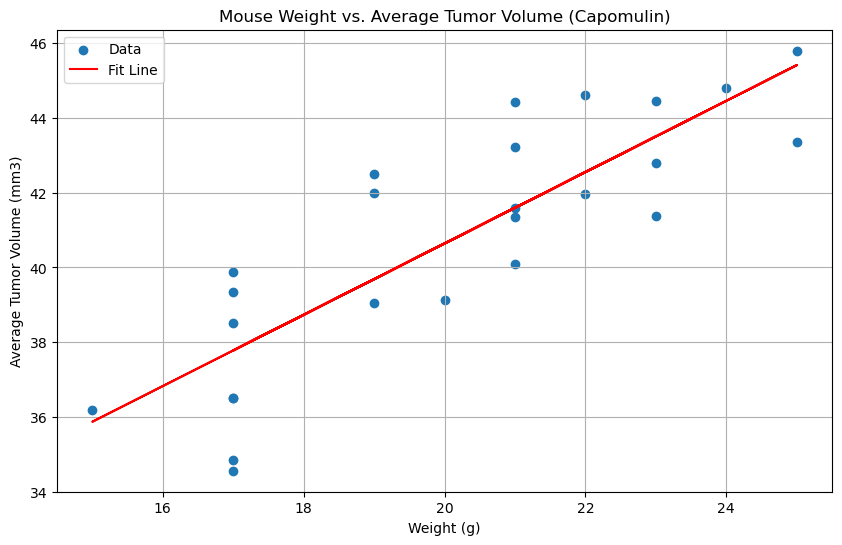

In [103]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import linregress

# Filter the data for Capomulin regimen
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and corresponding weight for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "mean")
)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    capomulin_avg_tumor_volume["Weight"],
    capomulin_avg_tumor_volume["Avg_Tumor_Volume"]
)

# Print results
print(f"Correlation coefficient (r): {r_value}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight"], capomulin_avg_tumor_volume["Avg_Tumor_Volume"], label='Data')
plt.plot(capomulin_avg_tumor_volume["Weight"], slope * capomulin_avg_tumor_volume["Weight"] + intercept, color='red', label='Fit Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()